# Modeling the Liability of Foreignness

In order to quantitatively describe the liability of foreignness in the context of informing and influencing global business decisions, we compute a pairwise similarity/difference measurement across a given set of countries which can be incorporated into traditional financial models.

<small>Additional factors influencing the potential return on investment such as entry mode and experience/learning curve are also taken into consideration, which is explained and surfaced in our cost of equity calculators. See _Accounting for Entry Mode_ and _Adding an Exponential Time Decay to the Liability of Foreignness_ below.</small>

## Country-level Data

The data used for all subsequent analysis and modeling originates from the following spreadsheet:
[Group 2 - Global Strategy, Group Assignment, Project Plan and Country Data](https://docs.google.com/spreadsheets/d/1bLodAytk4zxF9SPZjS6xyU-9o5V9YO929spkUWUDnJ0).

It contains country-level cultural, political, and economic data sourced from a variety of researchers and indices, including but not limited to Geert Hofstede, The World Bank, and The Heritage Foundation.

Our compiled data set contains seven cultural data dimensions, five political data dimensions, and ten economic data dimensions. A set of eight discrete economic dimensions are used in our _institutional distance_ measurement, while the remaining two economic rankings are used to surface asymmetrical, directional differences across pairwise country relationships.

In [ ]:
#@title Configure Data Source

data_source = 'static_copy'  #@param ['spreadsheet', 'static_copy']

#@markdown It is recommended to use static_copy for all use cases aside from iterative development.

#@markdown <small>Using the spreadsheet as a direct data source may require an additional authorization step. Follow any authentication and authorization prompts, if necessary, upon execution.</small>

def from_spreadsheet():
  from google.colab import auth
  from oauth2client.client import GoogleCredentials
  import gspread
  # Authenticate with Google to access our Spreadsheet
  auth.authenticate_user()
  creds = GoogleCredentials.get_application_default()
  client = gspread.authorize(creds)
  # Open the Spreadsheet by URL and target the worksheet that has our data prepared for export
  workbook = client.open_by_url('https://docs.google.com/spreadsheets/d/1bLodAytk4zxF9SPZjS6xyU-9o5V9YO929spkUWUDnJ0')
  worksheet = workbook.worksheet('Colab Export')
  # Load the raw data into memory
  return worksheet.get_all_values()

"""
def from_csv_export():
  import csv
  with open('/content/colab_export.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)
  return data
"""

if data_source == 'spreadsheet':
  data = from_spreadsheet()
#elif data_source == 'csv_export':
#  data = from_csv_export()
else:
  data = [['country', 'hofstede power distance', 'hofstede individualism', 'hofstede masculinity', 'hofstede uncertainty avoidance', 'hofstede long-term orientation',
  'internet users', 'fertility rate', 'corruption perception index score', 'heritage government integrity', 'heritage government spending',
  'wgi government effectiveness', 'wgi rule of law', 'global competitiveness score', 'heritage business freedom', 'heritage labor freedom',
  'heritage trade freedom', 'heritage tax burden', 'naic svo designation', 'doing business in starting a business', 'doing business in paying taxes',
  'doing business in global rank', 'doing business in global rank vigintile'],
 ['united states', '40', '91', '62', '46', '26', '74.55', '1.766', '69', '77.2', '56.5', '1.58', '1.45', '83.7', '83.3', '87.9', '79.8', '27.1', '1', '55',
  '25', '6', '0'],
 ['colombia', '67', '13', '64', '80', '13', '55.90497251', '1.825', '37', '46.1', '77', '-0.09', '-0.41', '62.7', '71.3', '78', '81.2', '18.8', '2', '95',
  '148', '67', '6'],
 ['norway', '31', '69', '8', '50', '35', '96.8103', '1.71', '84', '95.6', '25.6', '1.89', '1.97', '78.1', '86.1', '57.4', '83.8', '38.2', '1', '25', '34', '9',
  '0'],
 ['singapore', '74', '20', '48', '8', '72', '82.103', '1.16', '85', '92.4', '91.1', '2.23', '1.84', '84.8', '92.8', '90.9', '94.8', '14.1', '1', '4', '7', '2',
  '0'],
 ['jordan', '70', '30', '45', '65', '16', '53.4', '2.849', '48', '49.6', '73.5', '0.11', '0.23', '60.9', '60.1', '52.5', '81.2', '15', '4', '120', '62', '75',
  '7'],
 ['south africa', '49', '65', '63', '49', '34', '51.91911157', '2.43', '44', '46.6', '67.4', '0.34', '0.1', '62.4', '62', '58.8', '75.8', '28.6', '3', '139',
  '54', '84', '8']]

import pprint

pp = pprint.PrettyPrinter(width=160, compact=True)
pp.pprint(data)

[['country', 'hofstede power distance', 'hofstede individualism', 'hofstede masculinity', 'hofstede uncertainty avoidance', 'hofstede long-term orientation',
  'internet users', 'fertility rate', 'corruption perception index score', 'heritage government integrity', 'heritage government spending',
  'wgi government effectiveness', 'wgi rule of law', 'global competitiveness score', 'heritage business freedom', 'heritage labor freedom',
  'heritage trade freedom', 'heritage tax burden', 'naic svo designation', 'doing business in starting a business', 'doing business in paying taxes',
  'doing business in global rank', 'doing business in global rank vigintile'],
 ['united states', '40', '91', '62', '46', '26', '74.55', '1.766', '69', '77.2', '56.5', '1.58', '1.45', '83.7', '83.3', '87.9', '79.8', '27.1', '1', '55',
  '25', '6', '0'],
 ['colombia', '67', '13', '64', '80', '13', '55.90497251', '1.825', '37', '46.1', '77', '-0.09', '-0.41', '62.7', '71.3', '78', '81.2', '18.8', '2', '95',
  '

In [ ]:
%load_ext google.colab.data_table

In [ ]:
import pandas as pd

# Load raw data into a Pandas DataFrame
df = pd.DataFrame(data)
# Use the first row as column names
df.columns = df.iloc[0]
df = df.iloc[1:]
# Retain a 0-based index
df.index -= 1
df

,country,hofstede power distance,hofstede individualism,hofstede masculinity,hofstede uncertainty avoidance,hofstede long-term orientation,internet users,fertility rate,corruption perception index score,heritage government integrity,heritage government spending,wgi government effectiveness,wgi rule of law,global competitiveness score,heritage business freedom,heritage labor freedom,heritage trade freedom,heritage tax burden,naic svo designation,doing business in starting a business,doing business in paying taxes,doing business in global rank,doing business in global rank vigintile
0,united states,40,91,62,46,26,74.55,1.766,69,77.2,56.5,1.58,1.45,83.7,83.3,87.9,79.8,27.1,1,55,25,6,0
1,colombia,67,13,64,80,13,55.90497251,1.825,37,46.1,77,-0.09,-0.41,62.7,71.3,78,81.2,18.8,2,95,148,67,6
2,norway,31,69,8,50,35,96.8103,1.71,84,95.6,25.6,1.89,1.97,78.1,86.1,57.4,83.8,38.2,1,25,34,9,0
3,singapore,74,20,48,8,72,82.103,1.16,85,92.4,91.1,2.23,1.84,84.8,92.8,90.9,94.8,14.1,1,4,7,2,0
4,jordan,70,30,45,65,16,53.4,2.849,48,49.6,73.5,0.11,0.23,60.9,60.1,52.5,81.2,15,4,120,62,75,7
5,south africa,49,65,63,49,34,51.91911157,2.43,44,46.6,67.4,0.34,0.1,62.4,62,58.8,75.8,28.6,3,139,54,84,8


In [ ]:
# Assign the appropriate data types to our dimensions
for (name, series) in df.iteritems():
  if name == 'country':
    df[name] = series.astype(str)
  elif series.str.contains('.', regex=False).any():
    df[name] = series.astype(float)
  else:
    df[name] = series.astype(int)
df

,country,hofstede power distance,hofstede individualism,hofstede masculinity,hofstede uncertainty avoidance,hofstede long-term orientation,internet users,fertility rate,corruption perception index score,heritage government integrity,heritage government spending,wgi government effectiveness,wgi rule of law,global competitiveness score,heritage business freedom,heritage labor freedom,heritage trade freedom,heritage tax burden,naic svo designation,doing business in starting a business,doing business in paying taxes,doing business in global rank,doing business in global rank vigintile
0,united states,40,91,62,46,26,74.550000,1.766,69,77.2,56.5,1.58,1.45,83.7,83.3,87.9,79.8,27.1,1,55,25,6,0
1,colombia,67,13,64,80,13,55.904973,1.825,37,46.1,77.0,-0.09,-0.41,62.7,71.3,78.0,81.2,18.8,2,95,148,67,6
2,norway,31,69,8,50,35,96.810300,1.710,84,95.6,25.6,1.89,1.97,78.1,86.1,57.4,83.8,38.2,1,25,34,9,0
3,singapore,74,20,48,8,72,82.103000,1.160,85,92.4,91.1,2.23,1.84,84.8,92.8,90.9,94.8,14.1,1,4,7,2,0
4,jordan,70,30,45,65,16,53.400000,2.849,48,49.6,73.5,0.11,0.23,60.9,60.1,52.5,81.2,15.0,4,120,62,75,7
5,south africa,49,65,63,49,34,51.919112,2.430,44,46.6,67.4,0.34,0.10,62.4,62.0,58.8,75.8,28.6,3,139,54,84,8


## Principal Component Analysis

We reduce the dimensionality of each _institution_ to 1.

The `StandardScaler` provided by scikit learn is used to standardize all values across each dimension. It does so by removing the mean from each series and scaling to unit variance.

The result of this operation is a three dimensional vector for each country that contains a singular floating point value for each of its cultural, political, and economic institutions.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

principal_feature_names = ['cultural principal dimension', 'political principal dimension', 'economic principal dimension']

# Reduce the dimensionality of each macro-level (e.g., 'cultural') dimension to 1
def perform_pca(df, feature_names, new_feature_name):
  x = df.loc[:, feature_names].values
  # Standardize the features
  x = StandardScaler().fit_transform(x)
  pca = PCA(n_components=1)
  px = pca.fit_transform(x)
  pdf = pd.DataFrame(data = px, columns = [new_feature_name])
  return pdf

cdf = perform_pca(df, ['hofstede power distance', 'hofstede individualism', 'hofstede masculinity', 'hofstede uncertainty avoidance', 'hofstede long-term orientation', 'internet users', 'fertility rate'], principal_feature_names[0])
pdf = perform_pca(df, ['corruption perception index score', 'heritage government integrity', 'heritage government spending', 'wgi government effectiveness', 'wgi rule of law'], principal_feature_names[1])
edf = perform_pca(df, ['global competitiveness score', 'heritage business freedom', 'heritage labor freedom', 'heritage trade freedom', 'heritage tax burden', 'doing business in starting a business', 'doing business in paying taxes'], principal_feature_names[2])

# Combine principle dimensions into a new DataFrame that we'll use in all subsequent computations
pca_df = pd.concat([df['country'], cdf, pdf, edf], axis=1)
pca_df

,country,cultural principal dimension,political principal dimension,economic principal dimension
0,united states,0.438707,1.116632,1.347427
1,colombia,-1.941788,-2.498283,-1.386344
2,norway,2.130885,2.689494,1.022462
3,singapore,2.398248,2.056461,3.408308
4,jordan,-2.103472,-1.654806,-2.096333
5,south africa,-0.922580,-1.709498,-2.295519


In [ ]:
%unload_ext google.colab.data_table

### Visualizing the _Principal Institutional Dimensions_

Plotting each country's principle dimension values relative to their peers may give us a high-level sense of their relative "distance".

We will plot both a grouped histogram and a 3D scatter plot.

#### Histogram

Note the "shape" of each collection of bars per country. Compare this "shape" to the "shape" of other countries.

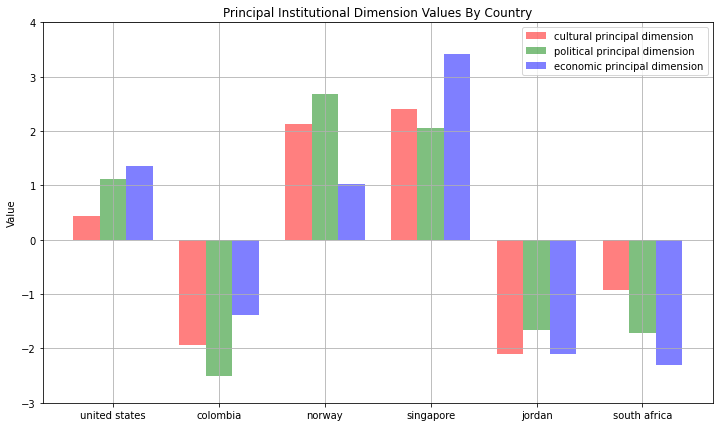

In [ ]:
import math
import matplotlib.pyplot as plt

(groups, dims) = (len(pca_df), 3)
bar_width = 1 / (dims + 1)
bar_offset = bar_width / 2
bar_colors = ['red', 'green', 'blue']

fig, axes = plt.subplots(figsize=(12, 7))

for i in range(dims):
  plt.bar(
    [j + bar_offset + bar_width * i for j in range(groups)],
    pca_df[principal_feature_names[i]],
    bar_width,
    alpha=0.5,
    color=bar_colors[i],
    label=pca_df['country'][i]
  )

axes.set_title('Principal Institutional Dimension Values By Country')
axes.set_ylabel('Value')
axes.set_xticks([i + 1.5 * bar_width for i in range(groups)])
axes.set_xticklabels(pca_df['country'])
plt.ylim([math.floor(pca_df[principal_feature_names].min().min()), math.ceil(pca_df[principal_feature_names].max().max())])
plt.legend(principal_feature_names)
plt.grid()
plt.show()

#### 3D Scatter Plot

Note the proximity between the more "similar" countries.

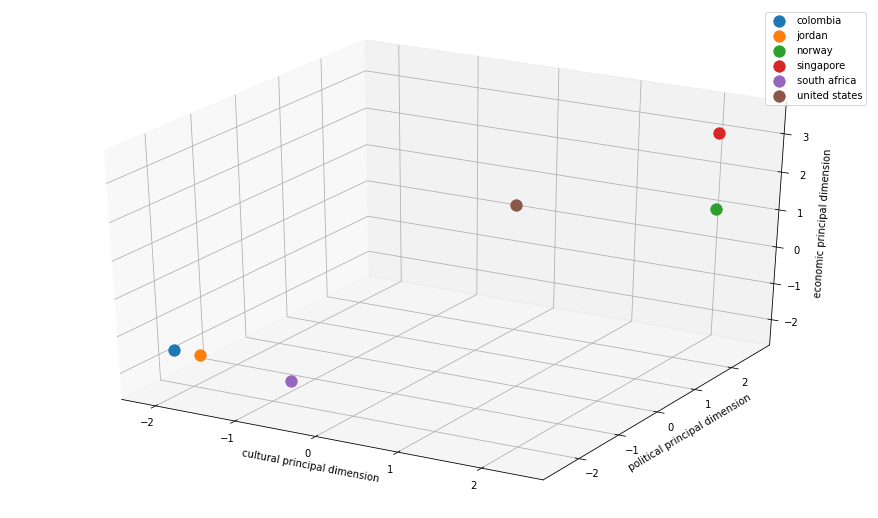

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 7))
axes = Axes3D(fig)

for name, i in pca_df.groupby('country').groups.items():
    x = pca_df.iloc[i, 1]
    y = pca_df.iloc[i, 2]
    z = pca_df.iloc[i, 3]
    axes.scatter(x, y, z, label=name, s=128)

axes.set_xlabel(principal_feature_names[0])
axes.set_ylabel(principal_feature_names[1])
axes.set_zlabel(principal_feature_names[2])
axes.legend()
plt.show()

## Measuring _Institutional Distances_

Using our standardized, three-dimensional institution-based vectors for each country, we can create pairwise distance matrices for our array of countries.

We have chosen to generate distance matrices that leverage a Euclidean distance measurement (which should be equivalent to the Mahalanobis distance given our previous PCA rotation), and a cosine difference measurement (i.e., one minus the cosine similarity of pairwise vectors).

These resulting distance matrices are unitless and will be combined to form a symmetric _institutional distance_ matrix for our selected countries.

In [ ]:
from scipy.spatial.distance import squareform, pdist

# Use Euclidean distance
# N.B.: This should be similar/equivalent to computing the Mahalanobis distance on the original multidimensional data given that we performed a PCA rotation
euc_dist_matrix = pd.DataFrame(
  squareform(pdist(pca_df.iloc[:, 1:], metric='euclidean')),
  columns=pca_df['country'].unique(),
  index=pca_df['country'].unique()
)
euc_dist_matrix

,united states,colombia,norway,singapore,jordan,south africa
united states,0.000000,5.119362,2.333016,2.995048,5.099316,4.807407
colombia,5.119362,0.000000,7.021541,7.910139,1.114307,1.577203
norway,2.333016,7.021541,0.000000,2.482836,6.821262,6.299506
singapore,2.995048,7.910139,2.482836,0.000000,8.021226,7.598947
jordan,5.099316,1.114307,6.821262,8.021226,0.000000,1.198822
south africa,4.807407,1.577203,6.299506,7.598947,1.198822,0.000000


In [ ]:
# Use Cosine distance (i.e., 1 - cos)
# N.B.: This could be useful given that the vectors have **not** been normalized, only standardized
cos_dist_matrix = pd.DataFrame(
  squareform(pdist(pca_df.iloc[:, 1:], metric='cosine')),
  columns=pca_df['country'].unique(),
  index=pca_df['country'].unique()
)
cos_dist_matrix

,united states,colombia,norway,singapore,jordan,south africa
united states,0.000000,1.884007,0.177081,0.052886,1.912262,1.996567
colombia,1.884007,0.000000,1.992365,1.904408,0.052735,0.110095
norway,0.177081,1.992365,0.000000,0.151038,1.909965,1.827600
singapore,0.052886,1.904408,0.151038,0.000000,1.986932,1.969723
jordan,1.912262,0.052735,1.909965,1.986932,0.000000,0.062755
south africa,1.996567,0.110095,1.827600,1.969723,0.062755,0.000000


In [ ]:
from functools import reduce

# Combine our two distances measures by averaging them
symmetric_dist_matrix = euc_dist_matrix.add(cos_dist_matrix, fill_value=0) / 2
symmetric_dist_matrix

,united states,colombia,norway,singapore,jordan,south africa
united states,0.000000,3.501684,1.255049,1.523967,3.505789,3.401987
colombia,3.501684,0.000000,4.506953,4.907274,0.583521,0.843649
norway,1.255049,4.506953,0.000000,1.316937,4.365613,4.063553
singapore,1.523967,4.907274,1.316937,0.000000,5.004079,4.784335
jordan,3.505789,0.583521,4.365613,5.004079,0.000000,0.630788
south africa,3.401987,0.843649,4.063553,4.784335,0.630788,0.000000


## Incorporating Asymmetry into the _Institutional Distance_ Matrix

We create an economic ranking for each country, and then use this ranking to create a pairwise _difference_ measurement, which preserves a sense of directionality, across countries.

This economic ranking _difference_ matrix will then be combined with our symmetric _institutional distance_ matrix in order to generate our final asymmetric _institutional distance/difference_ matrix.

In [ ]:
%load_ext google.colab.data_table

In [ ]:
# rank all countries based on their 'doing business in' global rank and their sovereign credit rating
max_global_rank = 190 # based on the cardinality of the 2020 'doing business in' data set
pca_df['dbi global rank'] = df['doing business in global rank']
pca_df['dbi percentage'] = df['doing business in global rank'] / max_global_rank
pca_df['naic svo designation'] = df['naic svo designation']
erank_df = pd.DataFrame(data = pca_df, columns = ['country', 'dbi global rank', 'dbi percentage', 'naic svo designation'])
erank_df

,country,dbi global rank,dbi percentage,naic svo designation
0,united states,6,0.031579,1
1,colombia,67,0.352632,2
2,norway,9,0.047368,1
3,singapore,2,0.010526,1
4,jordan,75,0.394737,4
5,south africa,84,0.442105,3


In [ ]:
%unload_ext google.colab.data_table

In [ ]:
from sklearn.metrics import pairwise_distances

# a custom "difference" function that preserves directionality for a pairwise economic comparison
# countries that have the same svo designation accumulate differences based on their relative dbi percentage ranks
# countries that have different svo designations accumulate differences based on their comparable svo designations and dbi percentage ranks
def rank_dist(a, b):
  return 0 if a[0] == b[0] else a[1] + a[1] - b[1] if a[2] == b[2] else a[1] + a[1] - b[1] + a[2] + b[2]

# generate a pairwise economic "difference" matrix based on economic rank using the above function
rank_matrix = pd.DataFrame(
  pairwise_distances(erank_df.loc[:, ['dbi global rank', 'dbi percentage', 'naic svo designation']], metric=rank_dist),
  columns=erank_df['country'].unique(),
  index=erank_df['country'].unique()
)
rank_matrix

,united states,colombia,norway,singapore,jordan,south africa
united states,0.000000,2.710526,0.015789,0.052632,4.668421,3.621053
colombia,3.673684,0.000000,3.657895,3.694737,6.310526,5.263158
norway,0.063158,2.742105,0.000000,0.084211,4.700000,3.652632
singapore,-0.010526,2.668421,-0.026316,0.000000,4.626316,3.578947
jordan,5.757895,6.436842,5.742105,5.778947,0.000000,7.347368
south africa,4.852632,5.531579,4.836842,4.873684,7.489474,0.000000


In [ ]:
from functools import reduce
from sklearn.preprocessing import MinMaxScaler

# fit/standardize all values in our economic "difference" matrix to the values in our symmetric distance matrix
scaler = MinMaxScaler()
flattened_dist_values = symmetric_dist_matrix.stack().values.reshape(1, -1)
flattened_rank_values = rank_matrix.stack().values.reshape(1, -1)
scaler.fit(flattened_dist_values)
scaled_rank_values = scaler.transform(flattened_rank_values)
scaled_rank_matrix = pd.DataFrame(
  scaled_rank_values.reshape(len(rank_matrix), len(rank_matrix)),
  columns=rank_matrix.columns,
  index=rank_matrix.index
)

# combine our symmetric distance matrix with our scaled economic "difference" by averaging them
asymmetric_dist_matrix = (symmetric_dist_matrix.add(scaled_rank_matrix, fill_value=0) / 2).applymap(lambda x: max(0, x))
# N.B. columns represent home country, rows represent host country
asymmetric_dist_matrix

,united states,colombia,norway,singapore,jordan,south africa
united states,0.000000,1.355263,0.007895,0.026316,2.334211,1.810526
colombia,1.836842,0.000000,1.828947,1.847368,3.155263,2.631579
norway,0.031579,1.371053,0.000000,0.042105,2.350000,1.826316
singapore,0.000000,1.334211,0.000000,0.000000,2.313158,1.789474
jordan,2.878947,3.218421,2.871053,2.889474,0.000000,3.673684
south africa,2.426316,2.765789,2.418421,2.436842,3.744737,0.000000


Note the pairwise measurements for Jordan and South Africa and compare them to their symmetric _institutional distance_ measurement in the previous section (0.630788).

While both countries are relatively similar to each other, and therefore have a small _institutional distance_ measurement between them, their economic ranking (i.e., the ease of doing business within these countries, for instance) is poor. This results in heightened values in our final asymmetrical _institutional distance/difference_ matrix for this country pairing (3.744737 and 3.673684, respectively).

### Sanity Checking Against Known Country Risk Premiums


In [ ]:
entry_mode_coefficients = {'export/import': 0.1, 'alliance': 0.5, 'wholly-owned subsidiary': 1}
Rf = 2.5 # default risk-free rate

In order to validate the accuracy of our resulting _institutional distance/difference_ matrix, we can sanity check our numbers against a comparable known data set.

We will compare our relative risk due to liability of foreignness which is derived from our difference matrix (see section below for more details) against [Damodaran's country risk premiums](http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/ctryprem.html).

| Country | Risk due to Liability of Foreignness<sup>1</sup> | Country Risk Premium |
|---------|--------------------------------------------------|-------------|
| United States | 0.00% | 0.00% |
| Colombia | 4.5921% | 3.48% |
| Norway | 0.0789% | 0.00% |
| Singapore | 0.00% | 0.00% |
| Jordan | 7.1973 | 8.24% |
| South Africa | 6.0658 | 4.57% |

<small>[1] As per our financial modeling described below, the liability of foreignness is calculated from the product of our _institutional distance_ measurement and a risk-free rate. The calculations in this table, in accordance with our subsequent examples, assume the usage of a risk-free rate of 2.5 and an expected market return rate of 7.5.</small>

Note the congruence and near equivalence of risk across similar countries like the United States, Norway, and Singapore. Also note the proportionality and directionality of the non-similar country rates.

## Pairwise Country Analysis for Financial Modeling

Given a _home country_ and a _host country_, we can compute an equity risk premimum and, subsequently, a firm's cost of equity that incorporates the additional risk resulting from the liability of foreignness. These calculations can then be further leveraged in traditional financial models.

Calculating the equity risk premium and cost of equity is inspired by the following approach described in [Incorporating CRP into the CAPM](https://www.investopedia.com/terms/c/country-risk-premium.asp#mntl-sc-block_1-0-45).

Cost of equity can be calculated using the following formula:

    Ri = Rf ​+ β(Rm ​− Rf) + Rlof

Wherein:

    Ri = expected return on investment (or cost of equity)
    β = project beta
    Rm​ = expected market return
    Rf​ = risk-free rate
    Rlof = additional risk due to liability of foreignness

`Rlof` is an idiosyncratic term to our model that is computed by taking the product of the risk-free rate and a pairwise country distance measurement (`Rf * Pairwise distance`).

We cap the value of `Rlof` at 30% based upon Rob Salomon's research and approach in _Global Vision_.

> ...considered what, from a financial perspective, might be a "reasonable" risk maximum and set the upper end of the _Global Acumen_ risk range at 30 percent. The percentage is based on insights derived from venture captial practices and payback investment techniques.

When project opportunities reside in the local base of operations, the equation reverts back to the traditional CAPM cost of equity formula (`Ri​ = Rf ​+ β(Rm ​− Rf)`). This is due to the resulting zero value of the pairwise distance measurement if the home and host country are equivalent.

### Example Calculation

A US-based company wishes to explore new business projects or opportunities in Colombia.

Given:

    β = project beta = 1.25
    Rm = expected market return = 7.5%
    Rf = risk-free rate = 2.5%
    Pairwise distance (US and Colombia) = 1.836842

The liability of foreignness (`Rlof`) is computed by multiplying the expected market return by the pairwise distance measurement.

    Rlof = Rf * Pairwise distance = 4.592105%

The cost of equity could be computed by applying the following:

    Ri = Rf + β(Rm − Rf + Rlof)
    Ri = Rf + β(Rm − Rf + Rm * Pairwise distance)
    Ri = 2.5% + (1.25 * (7.5% − 2.5%)) + (2.5% * 1.836842)
    Ri = 2.5% + (1.25 * (7.5% − 2.5%)) + 4.592105%
    Ri = 13.3421%

Note that this is a considerably higher cost of equity than if this business project or opportunity resided in the firm's local base of operations.

If the firm decided to pursue the project in the United States, the cost of equity would be `Re = 2.5% + (1.25 * (7.5% − 2.5%)) = 8.75%`.

This increase in risk is due to the liability of foreignness.​

Projects and opportunities across countries that are "more similar" will result in less risk than countries that are "more different" as per our model.

For example, if the above firm evaluated that same project or opportunity with Norway in mind for the host country, the cost of equity would decrease by a considerable margin:

    Ri = 2.5% + (1.25 * (7.5% − 2.5%) + (2.5% * 0.063158)
    Ri = 2.5% + (1.25 * (7.5% − 2.5%) + 0.07895%
    Ri = 8.8289%

### Accounting for Entry Mode

Depending on the desired entry mode, the _institutional distance_ (or liability of foreignness risk premium resulting from the _institutional distance_) may be discounted by an amount set forth in the following table.

| Entry Mode | Discount | Coefficient |
|------------|----------|-------------|
| Export/Import | 90% | 0.1 |
| Alliance | 50% | 0.5 |
| Wholly-owned subsidiary | 0% | 1 |

This is achieved by multiplying the given _institutional distance_ or risk due to the liability of foreignness by the appropriate coefficient listed above.

Using our previous example, if that same US-based firm that was considering a business opportunity in Colombia planned on employing an 'export/import' approach, their new cost of equity would be computed using the following equation:

    Ri = Rf + β(Rm − Rf + Rlof * Entry mode coefficient)
    Ri = Rf + β(Rm − Rf) + Rf * Pairwise distance * Entry mode coefficient)
    Ri = 2.5% + (1.25 * (7.5% − 2.5%)) + (2.5% * 1.836842 * 0.1)
    Ri = 2.5% + (1.25 * (7.5% − 2.5%)) + 0.45921%
    Ri = 9.20921%



In [ ]:
#@markdown ## Cost of Equity Calculator

#@markdown Select your base of operations

home_country = "united states"  #@param ['united states', 'colombia', 'norway', 'singapore', 'jordan', 'south africa']

#@markdown Select the country in which you'd like to do business

host_country = "colombia"  #@param ['united states', 'colombia', 'norway', 'singapore', 'jordan', 'south africa']

#@markdown Select the mode of entry for your business opportunity

entry_mode = "wholly-owned subsidiary" #@param ['export/import', 'alliance', 'wholly-owned subsidiary']

#@markdown Project Beta

beta = 1.25 #@param {type:"number"}

#@markdown Risk-free rate

Rf = 2.5 #@param {type:"number"}

#@markdown Expected market return

Rm = 7.5 #@param {type:"number"}

pairwise_distance = asymmetric_dist_matrix[home_country][host_country]
print(f"Pairwise distance = {pairwise_distance}")

Rlof = min(30, Rf * pairwise_distance * entry_mode_coefficients[entry_mode])
print(f"Risk due to liability of foreignness = {Rlof}%")

Ri = Rf + beta * (Rm - Rf) + Rlof
print(f"Cost of equity = {Ri}%")

Pairwise distance = 1.8368421052631578
Risk due to liability of foreignness = 4.592105263157895%
Cost of equity = 13.342105263157894%


## Adding an Exponential Time Decay to the Liability of Foreignness

Over time, if a given firm's project(s) or operation(s) sustains its presence in a host country, one may expect the risk resulting from the liability of foreignness to decrease.

To allow our model to handle sustained foreign experience and assimilation, we can apply an exponential decay function to our distance metric. As time increases, the distance value will tend toward zero.

The decay function is modeled as:

    decay(pairwise distance) = pairwise distance * e^(-Cexp * t)

Where:

    e = e mathematical constant
    Cexp = a coefficient representing a firm's experience in the host country
    t = time in years

The coefficient of experience is a term of art that can be inferred from a firm's gross experience and comfortability in the host country. It's value should be in the range [0, 1]. When used in this function, the coefficient of experience can be thought of as the firm's expected _experience_ or _learning_ growth rate.

This value could be gleaned from a cultural, economic, or political assessment taken by business managers to measure a firm's proficiency in dealing with matters in a host country, however, these details are outside the scope of this assignment.

For the remainder of this section, we will simply use values closer to zero to represent less knowledge, experience, and proficiency, and values closer to 1 to represent greater knowledge, experience, and proficiency.

### Example Calculation

Given our original example wherein a US-based firm desired to pursue a business opportunity in Colombia, if this firm had no prior experience or knowledge of Colombia, we would begin our modeling by using our original, unaltered distance measurement, 1.8368. This resulted in a relatively high cost of equity for our investment, 13.3421%

However, if the firm decided to pursue this opportunity, over time, one may assume that they would accumulate enough knowledge and experience that this relatively large value would unfairly characterize their future risk in this host country too pessimistically.

If their business opportunity was to last 15 years, we could apply our decay function to account for their experience and reduce the risk associated with the liability of foreignness.

A demonstration of how this time decay function will alter our distance measurement and our cost of equity is modeled on the calculator below.

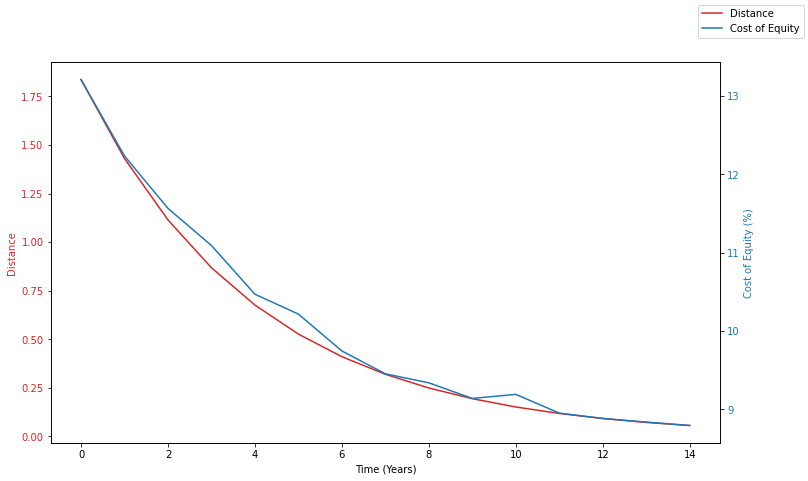

In [ ]:
#@markdown ## Cost of Equity Calculator (with Time Decay)

#@markdown Select your base of operations

home_country = "united states"  #@param ['united states', 'colombia', 'norway', 'singapore', 'jordan', 'south africa']

#@markdown Select the country in which you'd like to do business

host_country = "colombia"  #@param ['united states', 'colombia', 'norway', 'singapore', 'jordan', 'south africa']

#@markdown Select the mode of entry for your business opportunity

entry_mode = "wholly-owned subsidiary" #@param ['export/import', 'alliance', 'wholly-owned subsidiary']

#@markdown Set your expected proficiency growth rate in doing business within the host country

Cexp = 0.25 #@param {type:"slider", min:0.0, max:1.0, step:0.05}

#@markdown Set an optional jitter to model a dynamic market where rates change on an annual basis

#@markdown <small>Jitter will be applied as a random % change in the range [0, n) for the risk-free rate and expected market return rate.</small>

jitter = 1 #@param {type:"slider", min:0, max:10, step:1}

#@markdown Project Duration (years)

t = 15 #@param {type:"number"}

#@markdown Project Beta

beta = 1.25 #@param {type:"number"}

#@markdown Risk-free rate (%)

Rf = 2.5 #@param {type:"number"}

#@markdown Expected market return (%)

Rm = 7.5 #@param {type:"number"}

init_pairwise_distance = asymmetric_dist_matrix[home_country][host_country]

import math
import random
import matplotlib.pyplot as plt

def random_jitter(n, min, max):
  return n * ((random.randint(min, max) + 100) / 100)

def cost_of_equity(rm, rf, beta, dist, entry_mode, jitter):
  (lb, ub) = (-jitter, jitter)
  rm = random_jitter(rm, lb, ub)
  rf = random_jitter(rf, lb, ub)
  beta = random_jitter(beta, lb, ub)
  return rf + beta * (rm - rf) + min(30, rf * dist * entry_mode_coefficients[entry_mode])

def decay(dist, cexp, t):
  return dist * math.e ** (-cexp * t)

fig = plt.figure(figsize=(12, 7))

years = range(0, t)
dists = [decay(init_pairwise_distance, Cexp, n) for n in years]
coes = [cost_of_equity(Rm, Rf, beta, dist, entry_mode, jitter) for dist in dists]

ax1 = fig.add_subplot(111)
ax1color = 'tab:red'
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Distance', color=ax1color)
ax1.plot(years, dists, color=ax1color, label='Distance')
ax1.tick_params(axis='y', labelcolor=ax1color)

ax2 = ax1.twinx()
ax2color = 'tab:blue'
ax2.set_ylabel('Cost of Equity (%)', color=ax2color)
ax2.plot(years, coes, color=ax2color, label='Cost of Equity')
ax2.tick_params(axis='y', labelcolor=ax2color)

fig.legend(loc='upper right')
plt.show()
